# Projeto de Técnicas de Programação em Python - Manipulação de Arquivos CSV e Dataset

O projeto tem como premissa trabalhar com arquivos csv, criar dataset com os dados dos arquivos e aplicar as tecnicas visualizadas em sala no dataset. Para isso, foi consultada uma base de dados no [CoronavírusBrasil.](https://covid.saude.gov.br/).


Os códigos apresentados aqui são focados em praticar os conceitos apresentados em aula e fora da sala de aula. 

 
* [1. Importação das Bibliotecas](#1.-Importa%C3%A7%C3%A3o-das-Bibliotecas)
* [2. Importação dos Arquivos](#2.-Importa%C3%A7%C3%A3o-dos-arquivos)
* [2.1 - Ler arquivos Informados na Lista](#2.1---Ler-arquivos-informados-na-lista)
* [3. Criação do Dataframe](#3.-Cria%C3%A7%C3%A3o-do-Dataframe)
* [4.Visualizando as Distribuições dos Dados](#4.-Visualizando-as-distribui%C3%A7%C3%B5es-dos-dados)
* [5. Filtrando Dados](#5.-Filtrando-dados)
* [6. Removendo Colunas](#6.-Removendo-colunas)
* [7. Criando Colunas](#7.-Criando-colunas)
* [8. Aplicando Group by](#8.-Aplicando-group-by)
* [9. Criando Colunas](#9.-Criando-colunas)
* [9.1. - Media Anual e Media Anual por Estado](#9.1.-Media-Anual-e-Media-Anual-por-Estado)
* [9.2. - Criando Colunas Booleanas](#9.2.-Criando-colunas-booleanas)
* [9.3. - Transformando Colunas Booleanas em Numericas](#9.3.-Transformando-colunas-booleanas-em-numericas)
* [10. Gráficos](#10.-Gr%C3%A1ficos)



# 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns
%matplotlib inline

import os

## 2. Importação dos arquivos

Com o objetivo de praticar formas de leituras dos arquivos, apresentamos duas formas de ler e unificar varios arquivos. A primeira forma, indicando o nome de cada arquivo, e o segundo ler os arquivos de uma pasta de forma automatica.

### 2.1 - Ler arquivos informados na lista

##### Informando arquivos manualmente

In [16]:
# Informando arquivos manualmente
files_path = [
    './data/raw/HIST_PAINEL_COVIDBR_2020_Parte1_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2020_Parte2_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2021_Parte1_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2021_Parte2_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2022_Parte1_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2022_Parte2_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2023_Parte1_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2023_Parte2_05mar2024.csv',
    './data/raw/HIST_PAINEL_COVIDBR_2024_Parte1_05mar2024.csv',
    
]


##### Ler todos os arquivos csv de um diretorio

In [85]:
# Ler todos os arquivos csv de um diretorio
path = './data/raw/'
files_names = [os.path.join(path, filename) for filename in os.listdir(path)]
files_path = [file for file in files_names if file.lower().endswith(".csv") ]

## 3. Criação do Dataframe

In [86]:
# a função map aceita varios parametros, porém a funcoa pd.read_csv tem uma extensa lista de parametros que fica invial utilizar aqui.
# como precisamos informar o delimiter, então criamos uma função personalizada apenas para conseguirmos utilizar esse valor. 
def read_csv_custom (file):    
    return pd.read_csv(file, delimiter=';')

df_raw = pd.concat( map(read_csv_custom, files_path), ignore_index=True)
df_raw.shape
#(8075371, 17)

(8075371, 17)

In [87]:
df_raw.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


## 4. Visualizando as distribuições dos dados

In [88]:
def infoDf(df):
    # Funcao para visualizar informações sobres os dados de cada coluna
    info_df = pd.DataFrame({ 'Columns': df.columns,
                        'Type': df.dtypes,
                        'Unique': df.nunique(),                        
                        'Size': df.shape[0],
                        'Missing': df.isna().sum()    
    })
    info_df['% Unique'] = round(info_df['Unique']/info_df['Size'] ,3)
    info_df['% Missing'] = round(info_df['Missing']/info_df['Size'] ,3)
    return info_df

def missingData(df, num=20):
    #funcao que retorna as colunas que possuem valores null
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num)

In [28]:
infoDf(df_raw)

,Columns,Type,Unique,Size,Missing,% Unique,% Missing
regiao,regiao,object,1,8075371,0,0.000,0.000
estado,estado,object,27,8075371,1468,0.000,0.000
municipio,municipio,object,5297,8075371,71281,0.001,0.009
coduf,coduf,int64,28,8075371,0,0.000,0.000
codmun,codmun,float64,5591,8075371,41104,0.001,0.005
codRegiaoSaude,codRegiaoSaude,float64,450,8075371,71281,0.000,0.009
nomeRegiaoSaude,nomeRegiaoSaude,object,440,8075371,71281,0.000,0.009
data,data,object,1,8075371,0,0.000,0.000
semanaEpi,semanaEpi,int64,53,8075371,0,0.000,0.000
populacaoTCU2019,populacaoTCU2019,float64,5104,8075371,30177,0.001,0.004


In [21]:
missingData(df_raw, 10)

,Total,Percent
emAcompanhamentoNovos,8073904,0.999818
Recuperadosnovos,8073904,0.999818
interior/metropolitana,71281,0.008827
municipio,71281,0.008827
codRegiaoSaude,71281,0.008827
nomeRegiaoSaude,71281,0.008827
codmun,41104,0.005090
populacaoTCU2019,30177,0.003737
estado,1468,0.000182
obitosAcumulado,0,0.000000


In [22]:
df_raw.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,8.075371e+06,8.034267e+06,8.004090e+06,8.075371e+06,8.045194e+06,8.075371e+06,8.075371e+06,8.075371e+06,8.075371e+06,1.467000e+03,1.467000e+03,8.004090e+06
mean,3.236022e+01,3.252580e+05,3.240312e+04,2.690087e+01,1.142264e+05,1.291352e+04,1.433704e+01,2.753639e+02,2.639236e-01,2.268672e+07,4.702619e+05,6.929982e-02
std,9.874049e+00,9.853503e+04,9.836342e+03,1.507764e+01,2.966449e+06,3.829798e+05,6.884306e+02,8.007579e+03,1.585365e+01,1.354995e+07,5.694580e+05,2.539633e-01
min,1.100000e+01,1.100000e+05,1.100100e+04,1.000000e+00,7.810000e+02,0.000000e+00,-3.368370e+05,0.000000e+00,-9.114000e+03,0.000000e+00,-6.206000e+03,0.000000e+00
25%,2.500000e+01,2.512000e+05,2.501000e+04,1.400000e+01,5.474000e+03,3.270000e+02,0.000000e+00,5.000000e+00,0.000000e+00,9.248091e+06,9.243200e+04,0.000000e+00
50%,3.100000e+01,3.146100e+05,3.105900e+04,2.700000e+01,1.169500e+04,9.620000e+02,0.000000e+00,1.600000e+01,0.000000e+00,2.608251e+07,3.186440e+05,0.000000e+00
75%,4.100000e+01,4.119150e+05,4.101500e+04,4.000000e+01,2.576200e+04,2.623000e+03,1.000000e+00,4.400000e+01,0.000000e+00,3.624045e+07,7.082650e+05,0.000000e+00
max,7.600000e+01,5.300100e+05,5.300100e+04,5.300000e+01,2.101471e+08,3.859231e+07,3.369590e+05,7.104270e+05,9.115000e+03,3.774444e+07,1.123261e+07,1.000000e+00


###### Comentarios sobre a distribuição dos dados do dataset.
O dataset importado possui 17 colunas (features), e dentre essas 9 possuem algum dado 'missing' (NaN, Null). Porém 2 desses colunas possuem aproximadamente de 99.9% de seus dados como dados missing. Provavelmente essas features (colunas) possam ser removidas do dataset.


## 5. Filtrando dados

##### Filtrando os registros que possuem valores NaN na coluna estado

In [89]:
filtro_estado_NaN = df_raw.estado.isna() == False

df_p = df_raw[filtro_estado_NaN]
df_p.shape
#(8073903, 17)

(8073903, 17)

In [90]:
# Iremos filtrar apenas os registros que possuem os dados dos estados.
df_p = df_p[df_p.codmun.isna()]
df_p.shape
#(39636, 12)

(39636, 17)

## 6. Removendo colunas

In [91]:
colunas_removidas = ['codmun','municipio','codRegiaoSaude','nomeRegiaoSaude','Recuperadosnovos','emAcompanhamentoNovos','interior/metropolitana']
df_p.drop(columns=colunas_removidas, inplace=True)
df_p.shape
#(39636, 10)

(39636, 10)

## 7. Criando colunas

Os dados são um conjunto de registros diários. Então em um mês temos registros de varios dias. Neste momento queremos trabalhar apenas com os dados mensais, então precisamos agrupar todos as linhas de um mês em uma unica linha. Para isso iremos criar uma função que indica o ultimo dia de cada mes em cada um dos registros, iremos criar uma coluna com o valor do ulitmo dia de cada mês e depois iremos utilizar essa coluna para agrupar os registros do respectivo mês.

In [92]:
def ultimoDiaMes(data):
    # esse funcao ira retornar o ultimo dia do mês de cada data.
    try:
        data = datetime.strptime(str(data), '%Y-%m-%d')
        prox_mes = data.replace(day=28) + timedelta(days=4)      
        return (prox_mes - timedelta(days=prox_mes.day)).strftime("%d/%m/%Y") 
    except:
        return None

###### Criando a coluna 'fim_mes'

In [93]:
df_p['fim_mes'] = [ultimoDiaMes(x) for x in df_p['data']]
df_p.shape 
#(39636, 11)

(39636, 11)

###### Criando a coluna 'ano'

In [94]:
df_p['ano'] = [str(x)[6:10] if len(x)>=10 else x for x in df_p['fim_mes'] ]
print(df_p.shape) #(39636, 12)
df_p.head()


(39636, 12)


,regiao,estado,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,fim_mes,ano
158,Norte,RO,11,2020-02-25,9,1777225.0,0.0,0,0,0,29/02/2020,2020
159,Norte,RO,11,2020-02-26,9,1777225.0,0.0,0,0,0,29/02/2020,2020
160,Norte,RO,11,2020-02-27,9,1777225.0,0.0,0,0,0,29/02/2020,2020
161,Norte,RO,11,2020-02-28,9,1777225.0,0.0,0,0,0,29/02/2020,2020
162,Norte,RO,11,2020-02-29,9,1777225.0,0.0,0,0,0,29/02/2020,2020


###### Transformando a coluna 'fim_mes' em datetime

In [120]:
df_p['fim_mes'] = df_p['fim_mes'].astype('datetime64')
df_p['fim_mes']

C:\Users\KMA\AppData\Local\Temp\ipykernel_30948\3307428340.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_p['fim_mes'] = df_p['fim_mes'].astype('datetime64')


0      2021-02-28
1      2021-04-30
2      2021-06-30
3      2021-09-30
4      2021-11-30
          ...    
1345   2024-01-31
1346   2024-03-31
1347   2024-02-29
1348   2024-01-31
1349   2024-03-31
Name: fim_mes, Length: 1350, dtype: datetime64[ns]

## 8. Aplicando group by

In [95]:
colunas_selecionadas = ['regiao', 'estado', 'coduf', 'populacaoTCU2019','fim_mes', 'ano']
colunas_somadas = ['casosNovos','casosAcumulado','obitosAcumulado','obitosNovos']

df_p = df_p.groupby(colunas_selecionadas, as_index=False, dropna=False)[colunas_somadas].sum()

print(df_p.shape) #(1350, 10)
df_p.head()

(1350, 10)


,regiao,estado,coduf,populacaoTCU2019,fim_mes,ano,casosNovos,casosAcumulado,obitosAcumulado,obitosNovos
0,Centro-Oeste,DF,53,3015268.0,28/02/2021,2021,19584,8007193.0,131474,284
1,Centro-Oeste,DF,53,3015268.0,28/02/2022,2022,74998,18418179.0,316515,242
2,Centro-Oeste,DF,53,3015268.0,28/02/2023,2023,3015,25076183.0,331533,6
3,Centro-Oeste,DF,53,3015268.0,29/02/2020,2020,0,0.0,0,0
4,Centro-Oeste,DF,53,3015268.0,29/02/2024,2024,7659,27030799.0,346917,20


## 9. Criando colunas

### 9.1. Media Anual e Media Anual por Estado
Criando a colunas com base na média anual de casosNovos de todos os estados juntos

In [96]:
#anos = df_p['ano'].unique()
medias_Anuais = round(df_p.groupby(['ano'], dropna=False)['casosNovos'].sum() / 12, 2)
medias_Anuais.rename('mediaAnual', inplace=True)
medias_Anuais

ano
2020     639664.42
2021    1217629.00
2022    1170313.33
2023     156631.92
2024      31787.17
Name: mediaAnual, dtype: float64

###### Unificando o dataframe com outro dataframe

In [97]:
if 'mediaAnual' not in df_p.columns :
    df_p = df_p.merge(medias_Anuais, on="ano")
df_p.head()

,regiao,estado,coduf,populacaoTCU2019,fim_mes,ano,casosNovos,casosAcumulado,obitosAcumulado,obitosNovos,mediaAnual
0,Centro-Oeste,DF,53,3015268.0,28/02/2021,2021,19584,8007193.0,131474,284,1217629.0
1,Centro-Oeste,DF,53,3015268.0,30/04/2021,2021,34419,10897816.0,210876,1769,1217629.0
2,Centro-Oeste,DF,53,3015268.0,30/06/2021,2021,24558,12566779.0,269782,581,1217629.0
3,Centro-Oeste,DF,53,3015268.0,30/09/2021,2021,24778,14495913.0,307706,410,1217629.0
4,Centro-Oeste,DF,53,3015268.0,30/11/2021,2021,2810,15498442.0,328986,158,1217629.0


###### Criando a coluna de média anual de cada estado

In [98]:
#Media Anual por Estado
medias_anual_estado = round(df_p.groupby(['ano','estado'], dropna=False)['casosNovos'].sum() / 12, 2)
medias_anual_estado.rename('mediaAnualEstado', inplace=True)
medias_anual_estado

ano   estado
2020  AC         3468.33
      AL         8734.83
      AM        16751.08
      AP         5683.42
      BA        41116.67
                  ...   
2024  RS         1768.67
      SC         1236.25
      SE          184.75
      SP         4151.50
      TO          565.08
Name: mediaAnualEstado, Length: 135, dtype: float64

###### Unificando o dataframe

In [99]:
if 'mediaAnualEstado' not in df_p.columns:
    df_p = df_p.merge(medias_anual_estado, on=["ano","estado"])
df_p.head()

,regiao,estado,coduf,populacaoTCU2019,fim_mes,ano,casosNovos,casosAcumulado,obitosAcumulado,obitosNovos,mediaAnual,mediaAnualEstado
0,Centro-Oeste,DF,53,3015268.0,28/02/2021,2021,19584,8007193.0,131474,284,1217629.0,22342.5
1,Centro-Oeste,DF,53,3015268.0,30/04/2021,2021,34419,10897816.0,210876,1769,1217629.0,22342.5
2,Centro-Oeste,DF,53,3015268.0,30/06/2021,2021,24558,12566779.0,269782,581,1217629.0,22342.5
3,Centro-Oeste,DF,53,3015268.0,30/09/2021,2021,24778,14495913.0,307706,410,1217629.0,22342.5
4,Centro-Oeste,DF,53,3015268.0,30/11/2021,2021,2810,15498442.0,328986,158,1217629.0,22342.5


### 9.2. Criando colunas booleanas


Iremos criar 3 colunas booleanas para indicar se está acima, abaixo ou na média anual.

In [100]:
df_p['acimaMediaAnual'] = df_p['casosNovos'] > df_p['mediaAnual']
df_p['abaixoMediaAnual'] = df_p['casosNovos'] < df_p['mediaAnual']
df_p['naMediaAnual'] = df_p['casosNovos'] == df_p['mediaAnual']
df_p.head()

,regiao,estado,coduf,populacaoTCU2019,fim_mes,ano,casosNovos,casosAcumulado,obitosAcumulado,obitosNovos,mediaAnual,mediaAnualEstado,acimaMediaAnual,abaixoMediaAnual,naMediaAnual
0,Centro-Oeste,DF,53,3015268.0,28/02/2021,2021,19584,8007193.0,131474,284,1217629.0,22342.5,False,True,False
1,Centro-Oeste,DF,53,3015268.0,30/04/2021,2021,34419,10897816.0,210876,1769,1217629.0,22342.5,False,True,False
2,Centro-Oeste,DF,53,3015268.0,30/06/2021,2021,24558,12566779.0,269782,581,1217629.0,22342.5,False,True,False
3,Centro-Oeste,DF,53,3015268.0,30/09/2021,2021,24778,14495913.0,307706,410,1217629.0,22342.5,False,True,False
4,Centro-Oeste,DF,53,3015268.0,30/11/2021,2021,2810,15498442.0,328986,158,1217629.0,22342.5,False,True,False


### 9.3. Transformando colunas booleanas em numericas

In [101]:
# Modelo 1
# df_p["acimaMediaAnual"] = df_p["acimaMediaAnual"].astype(int)
# df_p["abaixoMediaAnual"] = df_p["abaixoMediaAnual"].astype(int)
# df_p["naMediaAnual"] = df_p["naMediaAnual"].astype(int)

# Modelo 2
df_p["acimaMediaAnual"].replace({False: 0, True: 1}, inplace=True)
df_p["abaixoMediaAnual"].replace({False: 0, True: 1}, inplace=True)
df_p["naMediaAnual"].replace({False: 0, True: 1}, inplace=True)
df_p.head()

,regiao,estado,coduf,populacaoTCU2019,fim_mes,ano,casosNovos,casosAcumulado,obitosAcumulado,obitosNovos,mediaAnual,mediaAnualEstado,acimaMediaAnual,abaixoMediaAnual,naMediaAnual
0,Centro-Oeste,DF,53,3015268.0,28/02/2021,2021,19584,8007193.0,131474,284,1217629.0,22342.5,0,1,0
1,Centro-Oeste,DF,53,3015268.0,30/04/2021,2021,34419,10897816.0,210876,1769,1217629.0,22342.5,0,1,0
2,Centro-Oeste,DF,53,3015268.0,30/06/2021,2021,24558,12566779.0,269782,581,1217629.0,22342.5,0,1,0
3,Centro-Oeste,DF,53,3015268.0,30/09/2021,2021,24778,14495913.0,307706,410,1217629.0,22342.5,0,1,0
4,Centro-Oeste,DF,53,3015268.0,30/11/2021,2021,2810,15498442.0,328986,158,1217629.0,22342.5,0,1,0


## 10. Gráficos

In [121]:
eh_sao_paulo = df_p['estado'] == 'SP'
ano_2022 = df_p['ano'] == '2022'

###### Histograma

<Axes: title={'center': 'Histograma de Casos Novos de Covid do Estado de SP em 2022'}, ylabel='Frequency'>

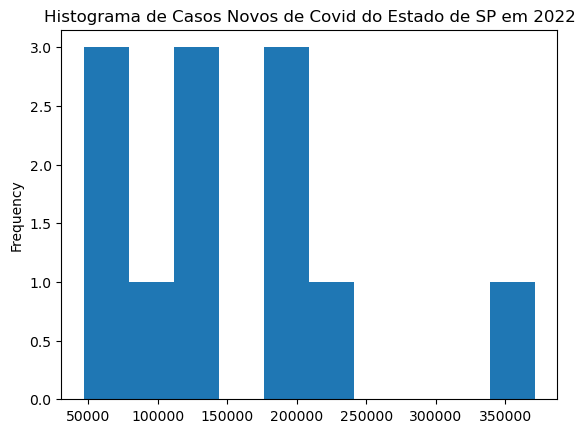

In [122]:
df_p[eh_sao_paulo & ano_2022].casosNovos.plot.hist(title='Histograma de Casos Novos de Covid do Estado de SP em 2022')

###### Boxplot

Text(0.5, 1.0, 'Boxplot de Casos Novos de Covid do Estado de SP em 2022')

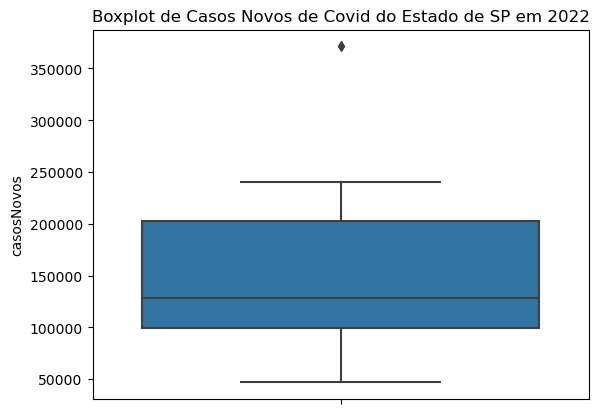

In [123]:
sns.boxplot(y='casosNovos', data=df_p[eh_sao_paulo & ano_2022]).set_title('Boxplot de Casos Novos de Covid do Estado de SP em 2022')

###### Gráfico de Barras

Text(0.5, 1.0, 'Numero de Casos Novos por Mês em 2022 no Estado de São Paulo')

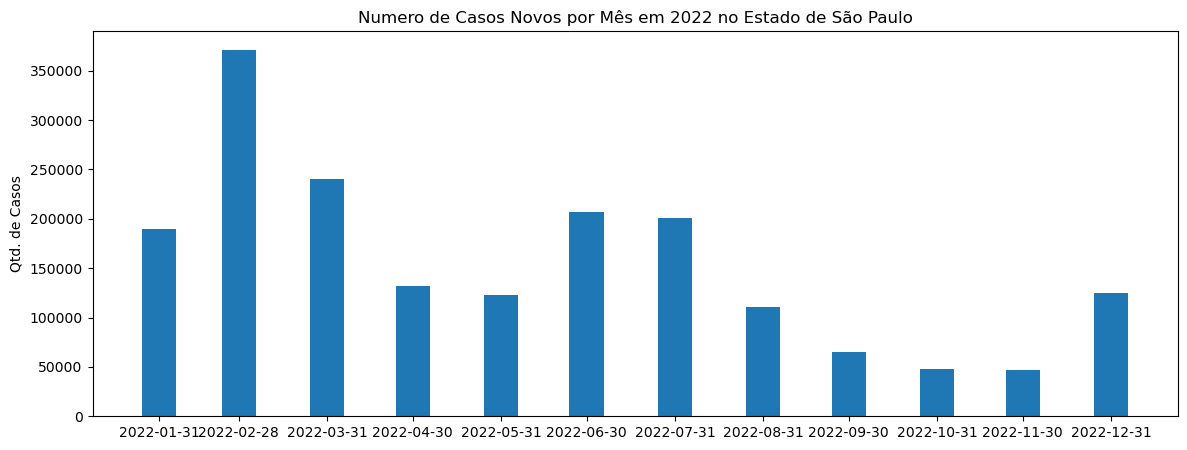

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
x = df_p[eh_sao_paulo & ano_2022].fim_mes
y = df_p[eh_sao_paulo & ano_2022].casosNovos

axes.bar(x,y, width=12)
axes.set_xticks(x)
axes.set_ylabel('Qtd. de Casos')
    
axes.set_title('Numero de Casos Novos por Mês em 2022 no Estado de São Paulo')

###### Gráfico de Barra e Boxplot

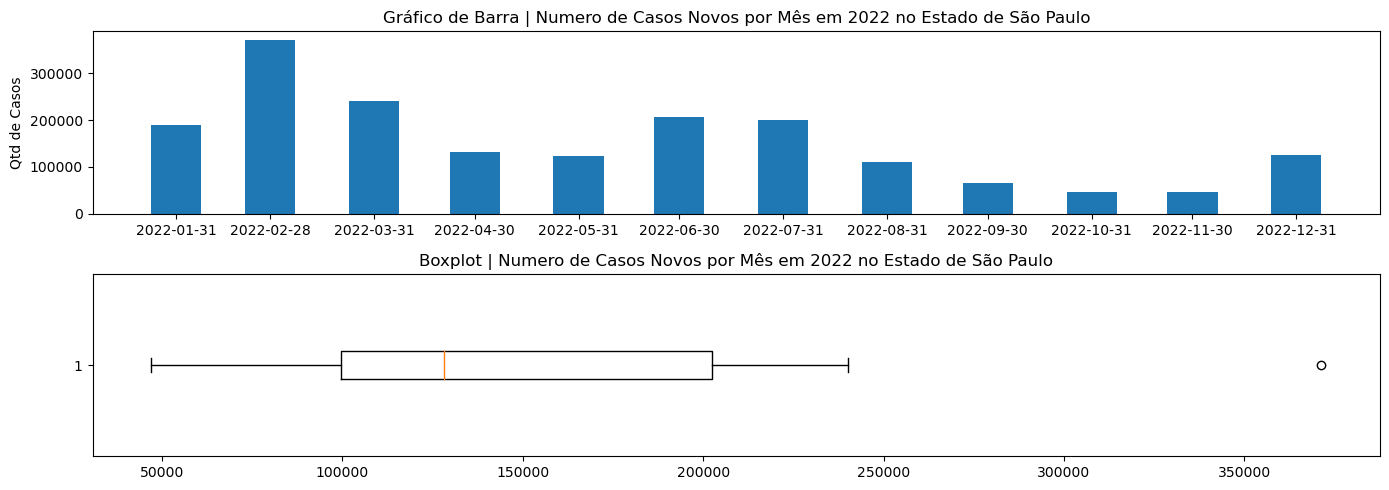

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,5))
x = df_p[eh_sao_paulo & ano_2022].fim_mes
y = df_p[eh_sao_paulo & ano_2022].casosNovos

axes[0].bar(x, y, width=15)
axes[0].set_xticks(x)
axes[0].set_ylabel('Qtd de Casos')
axes[0].set_title('Gráfico de Barra | Numero de Casos Novos por Mês em 2022 no Estado de São Paulo')
 
axes[1].boxplot(df_p[eh_sao_paulo & ano_2022].casosNovos, vert=False)
axes[1].set_title('Boxplot | Numero de Casos Novos por Mês em 2022 no Estado de São Paulo')

    
fig.tight_layout()